### Loading the Libraries

In [1]:
# Loadig the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

### Loading the dataset 

In [2]:
## loading the dataset

df = pd.read_excel("D:\Data Projects\Practice Files\IMDb Movies\IMDb Movies India.xlsx")
df

,Name,Year.2,Duration.1,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988.0,NaN,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999.0,129.0,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(15509, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        15509 non-null  object 
 1   Year.2      14981 non-null  float64
 2   Duration.1  7240 non-null   float64
 3   Genre       13632 non-null  object 
 4   Rating      7919 non-null   float64
 5   Votes       7919 non-null   float64
 6   Director    14984 non-null  object 
 7   Actor 1     13892 non-null  object 
 8   Actor 2     13125 non-null  object 
 9   Actor 3     12365 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


In [5]:
df.describe()

,Year.2,Duration.1,Rating,Votes
count,14981.000000,7240.000000,7919.000000,7919.000000
mean,1987.012215,128.126519,5.841621,1938.520394
std,25.416689,28.912724,1.381777,11602.415952
min,1913.000000,2.000000,1.100000,5.000000
25%,1968.000000,110.000000,4.900000,16.000000
50%,1991.000000,131.000000,6.000000,55.000000
75%,2009.000000,147.000000,6.800000,404.000000
max,2022.000000,321.000000,10.000000,591417.000000


### Cleaning the Dataset

In [6]:
df = df.rename(columns= {"Year.2" : "Year", "Duration.1" : "Duration in Minutes"})
df

,Name,Year,Duration in Minutes,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988.0,NaN,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999.0,129.0,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

Name                      0
Year                    528
Duration in Minutes    8269
Genre                  1877
Rating                 7590
Votes                  7590
Director                525
Actor 1                1617
Actor 2                2384
Actor 3                3144
dtype: int64

In [8]:
df["Year"] = df["Year"].fillna(df["Year"].mean())
df["Year"]

0        1987.012215
1        2019.000000
2        2021.000000
3        2019.000000
4        2010.000000
            ...     
15504    1988.000000
15505    1999.000000
15506    2005.000000
15507    1988.000000
15508    1998.000000
Name: Year, Length: 15509, dtype: float64

In [9]:
df["Year"] = df["Year"].astype(int)
df["Year"]

0        1987
1        2019
2        2021
3        2019
4        2010
         ... 
15504    1988
15505    1999
15506    2005
15507    1988
15508    1998
Name: Year, Length: 15509, dtype: int32

In [10]:
df = df.drop(index = [0])
df

,Name,Year,Duration in Minutes,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129.0,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df["Duration in Minutes"] = df["Duration in Minutes"].fillna(df["Duration in Minutes"].mean())

df["Duration in Minutes"] = df["Duration in Minutes"].astype(int)

In [12]:
df["Duration in Minutes"]

1        109
2         90
3        110
4        105
5        147
        ... 
15504    128
15505    129
15506    128
15507    128
15508    130
Name: Duration in Minutes, Length: 15508, dtype: int32

In [13]:
df["Rating"] = df["Rating"].fillna(df["Rating"].mean())
df["Rating"] = df["Rating"].astype(int)

In [14]:
df["Votes"] = df["Votes"].fillna(df["Votes"].mean())
df["Votes"] = df["Votes"].astype(int)

In [15]:
df = df.drop(["Name", "Director", "Actor 1", "Actor 2", "Actor 3"], axis = 1)
df

,Year,Duration in Minutes,Genre,Rating,Votes
1,2019,109,Drama,7,8
2,2021,90,"Drama, Musical",5,1938
3,2019,110,"Comedy, Romance",4,35
4,2010,105,Drama,5,1938
5,1997,147,"Comedy, Drama, Musical",4,827
...,...,...,...,...,...
15504,1988,128,Action,4,11
15505,1999,129,"Action, Drama",4,655
15506,2005,128,Action,5,1938
15507,1988,128,Action,5,1938


In [16]:
# dealing with duplicated values

df.duplicated().sum()

4978

In [17]:
df = df.drop_duplicates()
df

,Year,Duration in Minutes,Genre,Rating,Votes
1,2019,109,Drama,7,8
2,2021,90,"Drama, Musical",5,1938
3,2019,110,"Comedy, Romance",4,35
4,2010,105,Drama,5,1938
5,1997,147,"Comedy, Drama, Musical",4,827
...,...,...,...,...,...
15501,1992,128,"Action, Crime, Drama",5,135
15503,1989,125,"Action, Crime, Drama",5,44
15504,1988,128,Action,4,11
15505,1999,129,"Action, Drama",4,655


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10530 entries, 1 to 15508
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 10530 non-null  int32 
 1   Duration in Minutes  10530 non-null  int32 
 2   Genre                10193 non-null  object
 3   Rating               10530 non-null  int32 
 4   Votes                10530 non-null  int32 
dtypes: int32(4), object(1)
memory usage: 329.1+ KB


In [19]:
df.isnull().sum()

Year                     0
Duration in Minutes      0
Genre                  337
Rating                   0
Votes                    0
dtype: int64

In [20]:
df = df.dropna()
df.isnull().sum()

Year                   0
Duration in Minutes    0
Genre                  0
Rating                 0
Votes                  0
dtype: int64

### Visualizing the dataset

Text(0.5, 1.0, 'Frequency of Movie Ratings')

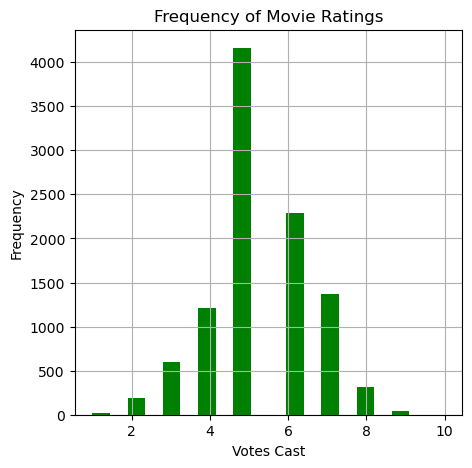

In [21]:
## finding out the highest and lowest votes cast

plt.figure(figsize=(5,5))
plt.hist(df["Rating"], bins = 20, color = "green")
plt.xlabel("Votes Cast")
plt.ylabel("Frequency")
plt.grid(True)
plt.title("Frequency of Movie Ratings")

In [31]:
df1 = df.drop(["Genre"], axis = 1)

### Comming up with the Prediction Model

In [32]:
X = df1.drop(["Rating"], axis = 1)

In [33]:
y = df1["Rating"]

In [34]:
import sklearn

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25)

In [37]:
log_reg = LogisticRegression()

In [38]:
log_reg.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
pred = log_reg.predict(X_test)
pred

array([5, 5, 5, ..., 5, 5, 5])

In [40]:
print(y_test)

4002     3
10965    5
4485     6
12440    7
12412    6
        ..
8457     5
898      5
2884     5
1828     5
6713     6
Name: Rating, Length: 2549, dtype: int32


In [42]:
accuracy_score(pred, y_test)

0.420557081208317

#### Conclusion: the model fairly predicts the movie ratings 